In [1]:
#import packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xesmf as xe
%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import math
import xlrd
import os
import matplotlib.colors as colors
import seaborn as sns
import scipy
import regionmask

from scipy.interpolate import interp1d
from scipy import interpolate

In [2]:
modellist4= pd.read_csv('PMIP4_modellist.csv',skipinitialspace=True,header=0)['model']
modellist3= pd.read_csv('PMIP3_modellist.csv',skipinitialspace=True,header=0)['model']
               
               
  





In [3]:
# load file
def opendata(p,v):
    modellist= pd.read_csv('%s_modellist.csv'%p,skipinitialspace=True,header=0)['model']
    f='../outputs/netcdf/%s_mh_diff_%s.nc'%(p,v)
    df=xr.open_dataset(f,decode_times=False)
    DATA={}
    for m in modellist:
        DATA[m]=df[m]
    return DATA

# 1. Global mean temperature 
lat weighting

In [5]:
#Weighted array
#equator=0: cos
#equatro=90: sin
#Weighted array
#equator=0: cos
#equatro=90: sin
w=[]
a_LAT=180
a_LON=360
for l in range(0,a_LAT): #lat No.
        lat=l*180/a_LAT
        lats=np.deg2rad(lat)
        we=np.sin(lats)
        w.append(we)

a2=np.ones((a_LAT,a_LON)) #lat X lon
for r in range(0,a_LAT):
    for c in range(0,a_LON):
        a2[r,c]=a2[r,c]*w[r]


In [15]:
tas_ann_3=opendata('PMIP3','tas_ann')
tas_ann_4=opendata('PMIP4','tas_ann')

In [24]:
def globalmean(data,modellist,name):
    DATA={}
    DDD=[]
    MMM=[]
    for m in modellist:
        d=data[m]
        ave=np.average(d,weights=a2)
        DATA[m]=ave
        DDD.append(ave)
        MMM.append(m)
    DF={'model':MMM,'val':DDD}
    pd.DataFrame(DF).to_csv('../table/%s.csv'%name)
    return DATA
    

In [25]:
tas_ave_ann3=globalmean(tas_ann_3,modellist3,'PMIP3_tas_ann_ave')
tas_ave_ann4=globalmean(tas_ann_4,modellist4,'PMIP4_tas_ann_ave')

In [26]:
tas_ave_ann3

{'BCC-CSM1-1': -0.13326890290266039,
 'CCSM4': -0.2606005215112653,
 'CNRM-CM5': 0.18339274178321574,
 'CSIRO-Mk3-6-0': 0.016214888625319834,
 'CSIRO-Mk3L-1-2': -0.004867553259650462,
 'EC-EARTH-2-2': -0.10313405929619568,
 'FGOALS-s2': -0.16370337174329774,
 'FGOALS-g2': -0.7277674055217528,
 'GISS-E2-R': -0.09973370307635253,
 'HadGEM2-CC': 0.21961635244042615,
 'HadGEM2-ES': 0.24388206433034343,
 'IPSL-CM5A-LR': -0.08836155249339896,
 'MIROC-ESM': -0.2551884404720571,
 'MPI-ESM-P': -0.23974980557889658,
 'MRI-CGCM3': -0.0231325816968785}

In [27]:
tas_ave_ann4

{'AWI-ESM-1-1-LR': -0.44122479635382095,
 'CESM2': -0.2046815267383937,
 'EC-Earth3-LR': -0.04798465977777975,
 'FGOALS-f3-L': -0.3716961873446525,
 'FGOALS-g3': -0.21223325158976591,
 'GISS-E2-1-G': -0.377638549911178,
 'HadGEM3-GC31': -0.12467136575251206,
 'INM-CM4-8': -0.2990380735347433,
 'IPSL-CM6A-LR': -0.36245853091458163,
 'MIROC-ES2L': -0.47383160017199466,
 'MPI-ESM1-2-LR': -0.36163135235833777,
 'MRI-ESM2-0': -0.17815211826036195,
 'NESM3': -0.26592732323388396,
 'NorESM1-F': -0.3616686449909128,
 'NorESM2-LM': -0.21665759034275875,
 'UofT-CCSM-4': -0.16423190561889703}

# 2. Summer NH high lat land

In [28]:
#land mask

from global_land_mask import globe
lat=np.arange(-89.5, 90., 1.0)
lon=np.arange(-179.5, 180, 1.0)

# Make a grid
lon_grid, lat_grid = np.meshgrid(lon,lat)

# Get whether the points are on land.
z = globe.is_land(lat_grid, lon_grid)


In [31]:

recons_file='../recons/anom6k/anom6k_grid_1x1.nc'
recons_data=xr.open_dataset(recons_file,decode_times=False)
recons_var=recons_data['summer']
rr=ma.masked_invalid(recons_var)

def nh_high_land(p,v,name):
    DATA={}
    MMM=[]
    DDD=[]
    f='../outputs/netcdf/%s_mh_diff_%s.nc'%(p,v)
    df=xr.open_dataset(f,decode_times=False)
    modellist= pd.read_csv('%s_modellist.csv'%p,skipinitialspace=True,header=0)['model']
    for m in modellist:
        MMM.append(m)
        dd=df[m]
        xxx=ma.array(dd,mask=rr.mask)
        xnan=np.ma.filled(xxx, np.nan)
        xxnan=ma.array(xnan,mask=z)
        xval=np.ma.filled(xxnan, np.nan)[50+90:80+90]
        ave=np.nanmean(xval)           
        DATA[m]=ave
        DDD.append(ave)
    DF={'model':MMM,'val':DDD}
    pd.DataFrame(DF).to_csv('../table/%s.csv'%name)
    return DATA



In [45]:
np.nanmean(recons_var[50+90:80+90])

0.6148939

In [32]:
land3=nh_high_land('PMIP3','tas_jja','PMIP3_nh_high_land')
land4=nh_high_land('PMIP4','tas_jja','PMIP4_nh_high_land')

In [33]:
land3

{'BCC-CSM1-1': 1.1031884,
 'CCSM4': 0.4300196,
 'CNRM-CM5': 1.5163945,
 'CSIRO-Mk3-6-0': 0.7732996,
 'CSIRO-Mk3L-1-2': 0.7307999,
 'EC-EARTH-2-2': 0.91118616,
 'FGOALS-s2': 0.76303434,
 'FGOALS-g2': 0.14829391,
 'GISS-E2-R': 1.2148901,
 'HadGEM2-CC': 1.9509454,
 'HadGEM2-ES': 1.6197321,
 'IPSL-CM5A-LR': 0.9996058,
 'MIROC-ESM': 0.47367385,
 'MPI-ESM-P': 0.8401698,
 'MRI-CGCM3': 1.0535474}

In [34]:
land4

{'AWI-ESM-1-1-LR': 0.024747927,
 'CESM2': 0.6727414,
 'EC-Earth3-LR': 1.8434963,
 'FGOALS-f3-L': 0.55858016,
 'FGOALS-g3': 1.0984378,
 'GISS-E2-1-G': 0.71126324,
 'HadGEM3-GC31': 1.2366652,
 'INM-CM4-8': 0.6635146,
 'IPSL-CM6A-LR': 0.5035311,
 'MIROC-ES2L': 0.57562155,
 'MPI-ESM1-2-LR': 0.5852151,
 'MRI-ESM2-0': 0.73352486,
 'NESM3': 0.9270349,
 'NorESM1-F': 0.4394543,
 'NorESM2-LM': 0.5310651,
 'UofT-CCSM-4': 1.1465952}

In [ ]:
recons_file='../recons/bartlein/map_delta_06ka_ALL_grid_2x2.nc'
recons_data=Dataset(recons_file)
recons_var=recons_data['map_anm_mean'][62:75,42:60]

# 3. drier Eastern N America
2 deg 
Bartlen MAP

In [50]:
#Drier NE America

recons_file='../recons/bartlein/map_delta_06ka_ALL_grid_2x2.nc'
recons_data=Dataset(recons_file)
recons_var=recons_data['map_anm_mean'][62:75,42:60]
rr=np.ma.filled(recons_var, np.nan)
def NEAmerica(p,v,name):
    dataset=opendata(p,v)
    modellist= pd.read_csv('%s_modellist.csv'%p,skipinitialspace=True,header=0)['model']
    DDD=[]
    MMM=[]
    DATA={}
    for m in modellist:
        MMM.append(m)
        dd=dataset[m][62:75,42:60]      
        xxx=ma.array(dd,mask=recons_var.mask)
        xnan=np.ma.filled(xxx, np.nan)
        ave=np.nanmean(xnan)*365           
        DATA[m]=ave
        DDD.append(ave)
        DF={'model':MMM,'val':DDD}
        pd.DataFrame(DF).to_csv('../table/%s.csv'%name)
    return DATA

In [54]:
np.nanmean(rr)

-92.48864

In [51]:
NEA3=NEAmerica('PMIP3','pr_ann_2deg','PMIP3_NEAmerica')
NEA4=NEAmerica('PMIP4','pr_ann_2deg','PMIP4_NEAmerica')

In [52]:
NEA3

{'BCC-CSM1-1': 1.9873127434402704,
 'CCSM4': -5.218586232513189,
 'CNRM-CM5': -21.362791564315557,
 'CSIRO-Mk3-6-0': -6.193927368149161,
 'CSIRO-Mk3L-1-2': 26.34800173342228,
 'EC-EARTH-2-2': -4.037074190564454,
 'FGOALS-s2': 5.053246347233653,
 'FGOALS-g2': -21.84692921116948,
 'GISS-E2-R': 8.349521094933152,
 'HadGEM2-CC': -40.8254162222147,
 'HadGEM2-ES': -36.099113784730434,
 'IPSL-CM5A-LR': 9.527381919324398,
 'MIROC-ESM': -25.638322792947292,
 'MPI-ESM-P': -28.631210289895535,
 'MRI-CGCM3': -5.386320604011416}

In [53]:
NEA4

{'AWI-ESM-1-1-LR': -57.55774326622486,
 'CESM2': -53.90792079269886,
 'EC-Earth3-LR': -27.857311256229877,
 'FGOALS-f3-L': -24.170661829411983,
 'FGOALS-g3': -92.30460733175278,
 'GISS-E2-1-G': -14.514355659484863,
 'HadGEM3-GC31': -9.237993778660893,
 'INM-CM4-8': 24.34418525546789,
 'IPSL-CM6A-LR': -23.345549888908863,
 'MIROC-ES2L': 29.6964643150568,
 'MPI-ESM1-2-LR': -26.369031332433224,
 'MRI-ESM2-0': -22.18207161873579,
 'NESM3': 59.05425772070885,
 'NorESM1-F': -6.2927233800292015,
 'NorESM2-LM': 137.02975913882256,
 'UofT-CCSM-4': -7.5569012854248285}

# 4. Drier Midcontinental Eurasia
Bartlein MAP

In [55]:
#Drier  Midcontinental Eurasia

recons_file='../recons/bartlein/map_delta_06ka_ALL_grid_2x2.nc'
recons_data=Dataset(recons_file)
recons_var=recons_data['map_anm_mean'][65:75,105:150]
rr=np.ma.filled(recons_var, np.nan)
def MCEruasia(p,v,name):
    dataset=opendata(p,v)
    modellist= pd.read_csv('%s_modellist.csv'%p,skipinitialspace=True,header=0)['model']
    DDD=[]
    MMM=[]
    DATA={}
    for m in modellist:
        MMM.append(m)
        dd=dataset[m][65:75,105:150]    
        xxx=ma.array(dd,mask=recons_var.mask)
        xnan=np.ma.filled(xxx, np.nan)
        ave=np.nanmean(xnan)*365           
        DATA[m]=ave
        DDD.append(ave)
        DF={'model':MMM,'val':DDD}
        pd.DataFrame(DF).to_csv('../table/%s.csv'%name)
    return DATA

In [56]:
np.nanmean(rr)

121.09201

In [57]:
MCE3=MCEruasia('PMIP3','pr_ann_2deg','PMIP3_MCEruasia')
MCE4=MCEruasia('PMIP4','pr_ann_2deg','PMIP4_MCEruasia')

In [58]:
MCE3

{'BCC-CSM1-1': -0.8574652939569205,
 'CCSM4': -7.143283365294337,
 'CNRM-CM5': 6.002737637609243,
 'CSIRO-Mk3-6-0': -10.79356542788446,
 'CSIRO-Mk3L-1-2': 5.562640656717122,
 'EC-EARTH-2-2': -17.0227506197989,
 'FGOALS-s2': 4.045207761228085,
 'FGOALS-g2': -20.42145662009716,
 'GISS-E2-R': 7.95167469419539,
 'HadGEM2-CC': 4.101573368534446,
 'HadGEM2-ES': 8.437197906896472,
 'IPSL-CM5A-LR': -3.543282113969326,
 'MIROC-ESM': -47.06812597811222,
 'MPI-ESM-P': 0.1748163921001833,
 'MRI-CGCM3': 4.010068573988974}

In [59]:
MCE4

{'AWI-ESM-1-1-LR': -21.230971086770296,
 'CESM2': -15.849437415599823,
 'EC-Earth3-LR': 11.656901445239782,
 'FGOALS-f3-L': -10.578210558742285,
 'FGOALS-g3': -57.74837754666805,
 'GISS-E2-1-G': -8.755758395418525,
 'HadGEM3-GC31': 1.7928084987215698,
 'INM-CM4-8': -2.345024305395782,
 'IPSL-CM6A-LR': -31.67926751077175,
 'MIROC-ES2L': -25.779003277420998,
 'MPI-ESM1-2-LR': -17.9436107352376,
 'MRI-ESM2-0': -14.829641915857792,
 'NESM3': 24.261445626616478,
 'NorESM1-F': -7.902176408097148,
 'NorESM2-LM': 136.8730528652668,
 'UofT-CCSM-4': -3.2277242513373494}

# Midcontinental Eurasia seasonality （作废）

In [61]:
def MCEruasia_sm(p,v,name):
    dataset=opendata(p,v)
    modellist= pd.read_csv('%s_modellist.csv'%p,skipinitialspace=True,header=0)['model']
    DDD=[]
    MMM=[]
    DATA={}
    for m in modellist:
        MMM.append(m)
        dd=dataset[m][65:75,105:150]    
        ave=np.average(dd)           
        DATA[m]=ave
        DDD.append(ave)
        DF={'model':MMM,'val':DDD}
        pd.DataFrame(DF).to_csv('../table/%s.csv'%name)
    return DATA

In [69]:
MCEsm3jja=MCEruasia_sm('PMIP3','tas_jja_2deg','PMIP3_MCEruasia_tas_jja')
MCEsm4jja=MCEruasia_sm('PMIP4','tas_jja_2deg','PMIP4_MCEruasia_tas_jja')
MCEsm3djf=MCEruasia_sm('PMIP3','tas_djf_2deg','PMIP3_MCEruasia_tas_djf')
MCEsm4djf=MCEruasia_sm('PMIP4','tas_djf_2deg','PMIP4_MCEruasia_tas_djf')

In [72]:

MCEsm3djf

{'BCC-CSM1-1': -0.38858375,
 'CCSM4': -0.9555341,
 'CNRM-CM5': 0.2233746,
 'CSIRO-Mk3-6-0': -0.31317532,
 'CSIRO-Mk3L-1-2': -0.27179268,
 'EC-EARTH-2-2': -0.008453505,
 'FGOALS-s2': -0.64101696,
 'FGOALS-g2': -1.2995586,
 'GISS-E2-R': 0.08178662,
 'HadGEM2-CC': 0.051318765,
 'HadGEM2-ES': 0.33763167,
 'IPSL-CM5A-LR': -0.15882786,
 'MIROC-ESM': -0.86890286,
 'MPI-ESM-P': -0.43431774,
 'MRI-CGCM3': -0.6983314}

In [73]:
MCEsm3={}
for m in modellist3:
    x=MCEsm3jja[m]-MCEsm3djf[m]
    MCEsm3[m]=x
MCEsm4={}
for m in modellist4:
    x=MCEsm4jja[m]-MCEsm4djf[m]
    MCEsm4[m]=x

In [74]:
MCEsm3

{'BCC-CSM1-1': 2.530422,
 'CCSM4': 2.7199078,
 'CNRM-CM5': 1.6127316,
 'CSIRO-Mk3-6-0': 2.4695578,
 'CSIRO-Mk3L-1-2': 2.328323,
 'EC-EARTH-2-2': 2.00119,
 'FGOALS-s2': 2.612465,
 'FGOALS-g2': 2.7385125,
 'GISS-E2-R': 0.8997601,
 'HadGEM2-CC': 2.3013978,
 'HadGEM2-ES': 2.1725073,
 'IPSL-CM5A-LR': 2.1658838,
 'MIROC-ESM': 3.1357665,
 'MPI-ESM-P': 2.316335,
 'MRI-CGCM3': 2.571431}

In [75]:
MCEsm4

{'AWI-ESM-1-1-LR': 2.117224,
 'CESM2': 2.6647656,
 'EC-Earth3-LR': 2.013226,
 'FGOALS-f3-L': 2.7744582,
 'FGOALS-g3': 3.7646565,
 'GISS-E2-1-G': 2.0529094,
 'HadGEM3-GC31': 2.2079592,
 'INM-CM4-8': 2.5013638,
 'IPSL-CM6A-LR': 3.0790014,
 'MIROC-ES2L': 2.6716595,
 'MPI-ESM1-2-LR': 2.6953874,
 'MRI-ESM2-0': 2.1844044,
 'NESM3': 1.6622193,
 'NorESM1-F': 3.283526,
 'NorESM2-LM': 2.5767386,
 'UofT-CCSM-4': 2.7589033}

In [6]:
# drier S. america [90:120,165:210]
#Drier Eastern North America
#Wetter Indo-Gangetic plain
#Drier Midcontinental Eurasia

# 5. NAF expansion

In [4]:
#Expansion of NAF
def NAFexpansion(p,expt):
    lat=np.arange(-89.5,90,1)
    LL=lat[90:120]
    data_file='../outputs/netcdf/%s_%s_monsoon.nc'%(p,expt)
    dataset=Dataset(data_file)
    model= pd.read_csv('%s_modellist.csv'%p,skipinitialspace=True,header=0)['model']
    data={}
    data['lat']=LL
    for m in model:
        dd=dataset[m][90:120,160:210]      
        ave=np.average(dd,axis=1)
        data[m]=ave
    ddd=pd.DataFrame(data)
    ddd.to_csv('../table/%s_%s_mb.csv'%(p,expt))

In [5]:
NAFexpansion('PMIP4','piControl')

In [6]:
NAFexpansion('PMIP3','piControl')

In [7]:
NAFexpansion('PMIP4','midHolocene')

In [8]:
NAFexpansion('PMIP3','midHolocene')

In [13]:
def NAFexpansion_diff(p):
    modellist=pd.read_csv('%s_modellist.csv'%p,skipinitialspace=True,header=0)['model']
    mh=pd.read_csv('../table/%s_midHolocene_mb.csv'%p,skipinitialspace=True,header=0)
    pi=pd.read_csv('../table/%s_picontrol_mb.csv'%p,skipinitialspace=True,header=0)
    ymh=mh['lat']
    ypi=pi['lat']
    LAT={}
    MMM=[]
    MH=[]
    PI=[]
    D=[]
    for m in modellist:
        xpi=pi[m]
        xmh=mh[m]
        fpi= interp1d(xpi, ypi, kind='cubic')
        fmh= interp1d(xmh, ymh, kind='cubic')
        x2=[2]
        lpi=fpi(x2)
        lmh=fmh(x2)
        l=lmh-lpi
        ll=[lmh[0],lpi[0],l[0]]
        LAT[m]=ll
        MMM.append(m)
        MH.append(lmh[0])
        PI.append(lpi[0])
        D.append(l[0])
    DF=pd.DataFrame({'model':MMM,'mh':MH,'pi':PI,'d':D})
    DF.to_csv('../table/%s_NAF_Expansion.csv'%p)
    return LAT

In [14]:
LAT3=NAFexpansion_diff('PMIP3')
LAT3

{'BCC-CSM1-1': [14.843422145293964, 13.932262436569925, 0.9111597087240391],
 'CCSM4': [16.58457325217075, 15.072580679813168, 1.511992572357581],
 'CNRM-CM5': [16.860233771574205, 15.53536115975846, 1.324872611815744],
 'CSIRO-Mk3-6-0': [25.02727374746701, 21.90111982520231, 3.126153922264699],
 'CSIRO-Mk3L-1-2': [24.247200198158986, 6.508215175403222, 17.738985022755763],
 'EC-EARTH-2-2': [17.130287110066707, 13.741972922493172, 3.3883141875735348],
 'FGOALS-s2': [14.88125855897002, 12.838137850415418, 2.0431207085546017],
 'FGOALS-g2': [17.461269355183035, 14.628214841084795, 2.83305451409824],
 'GISS-E2-R': [15.108926943218993, 14.544388437916142, 0.5645385053028509],
 'HadGEM2-CC': [14.168690661628375, 11.283666237972966, 2.885024423655409],
 'HadGEM2-ES': [14.992806601468134, 11.829868989371732, 3.1629376120964015],
 'IPSL-CM5A-LR': [13.99852737385165, 12.367943389891241, 1.630583983960408],
 'MIROC-ESM': [17.50555932285992, 15.375772514899001, 2.129786807960919],
 'MPI-ESM-P': [

In [15]:
LAT4=NAFexpansion_diff('PMIP4')
LAT4

{'AWI-ESM-1-1-LR': [18.57681519236091, 15.430750998787849, 3.1460641935730624],
 'CESM2': [13.816766323796411, 14.028482354792716, -0.2117160309963051],
 'EC-Earth3-LR': [13.824709840148037, 14.28884486496671, -0.46413502481867397],
 'FGOALS-f3-L': [13.324341970583177, 11.803240732781521, 1.5211012378016555],
 'FGOALS-g3': [13.615282680688901, 11.858898258376707, 1.7563844223121947],
 'GISS-E2-1-G': [15.520469762963254, 13.899386020972925, 1.6210837419903292],
 'HadGEM3-GC31': [14.668083362473066, 12.361380776598423, 2.3067025858746426],
 'INM-CM4-8': [16.03490174917936, 12.890544387811506, 3.144357361367856],
 'IPSL-CM6A-LR': [13.797704625734871, 12.85567609599026, 0.9420285297446114],
 'MIROC-ES2L': [15.215733798310136, 13.93224862567078, 1.283485172639356],
 'MPI-ESM1-2-LR': [16.67707326333741, 12.989161769142264, 3.687911494195145],
 'MRI-ESM2-0': [15.690945999518252, 12.400119478052792, 3.29082652146546],
 'NESM3': [17.88029622785402, 14.800243557040943, 3.080052670813078],
 'NorE

In [11]:
LAT3=NAFexpansion_diff('PMIP3')
LAT3

{'BCC-CSM1-1': [14.843422145293964, 13.932262436569925, 0.9111597087240391],
 'CCSM4': [16.58457325217075, 15.072580679813168, 1.511992572357581],
 'CNRM-CM5': [16.860233771574205, 15.53536115975846, 1.324872611815744],
 'CSIRO-Mk3-6-0': [25.02727374746701, 21.90111982520231, 3.126153922264699],
 'CSIRO-Mk3L-1-2': [24.247200198158986, 6.508215175403222, 17.738985022755763],
 'EC-EARTH-2-2': [17.130287110066707, 13.741972922493172, 3.3883141875735348],
 'FGOALS-s2': [14.88125855897002, 12.838137850415418, 2.0431207085546017],
 'FGOALS-g2': [17.461269355183035, 14.628214841084795, 2.83305451409824],
 'GISS-E2-R': [15.108926943218993, 14.544388437916142, 0.5645385053028509],
 'HadGEM2-CC': [14.168690661628375, 11.283666237972966, 2.885024423655409],
 'HadGEM2-ES': [14.992806601468134, 11.829868989371732, 3.1629376120964015],
 'IPSL-CM5A-LR': [13.99852737385165, 12.367943389891241, 1.630583983960408],
 'MIROC-ESM': [17.50555932285992, 15.375772514899001, 2.129786807960919],
 'MPI-ESM-P': [

In [12]:
LAT4=NAFexpansion_diff('PMIP4')
LAT4

{'AWI-ESM-1-1-LR': [18.57681519236091, 15.430750998787849, 3.1460641935730624],
 'CESM2': [13.816766323796411, 14.028482354792716, -0.2117160309963051],
 'EC-Earth3-LR': [13.824709840148037, 14.28884486496671, -0.46413502481867397],
 'FGOALS-f3-L': [13.324341970583177, 11.803240732781521, 1.5211012378016555],
 'FGOALS-g3': [13.615282680688901, 11.858898258376707, 1.7563844223121947],
 'GISS-E2-1-G': [15.520469762963254, 13.899386020972925, 1.6210837419903292],
 'HadGEM3-GC31': [14.668083362473066, 12.361380776598423, 2.3067025858746426],
 'INM-CM4-8': [16.03490174917936, 12.890544387811506, 3.144357361367856],
 'IPSL-CM6A-LR': [13.797704625734871, 12.85567609599026, 0.9420285297446114],
 'MIROC-ES2L': [15.215733798310136, 13.93224862567078, 1.283485172639356],
 'MPI-ESM1-2-LR': [16.67707326333741, 12.989161769142264, 3.687911494195145],
 'MRI-ESM2-0': [15.690945999518252, 12.400119478052792, 3.29082652146546],
 'NESM3': [17.88029622785402, 14.800243557040943, 3.080052670813078],
 'NorE

# Drier S America


In [16]:
def drySA(p,v,name):
    dataset=opendata(p,v)
    modellist= pd.read_csv('%s_modellist.csv'%p,skipinitialspace=True,header=0)['model']
    DDD=[]
    MMM=[]
    DATA={}
    for m in modellist:
        MMM.append(m)
        dd=dataset[m][70:90,115:135]   
        ave=np.average(dd)*365           
        DATA[m]=ave
        DDD.append(ave)
        DF={'model':MMM,'val':DDD}
        pd.DataFrame(DF).to_csv('../table/%s.csv'%name)
    return DATA

In [17]:
data3=drySA('PMIP3','pr_ann','PMIP3_drySA')
data3

{'BCC-CSM1-1': -33.45331393182278,
 'CCSM4': -2.6021883520297706,
 'CNRM-CM5': -97.91832730174065,
 'CSIRO-Mk3-6-0': -43.38334482163191,
 'CSIRO-Mk3L-1-2': -88.46883349120617,
 'EC-EARTH-2-2': -91.0818175971508,
 'FGOALS-s2': -90.45280061662197,
 'FGOALS-g2': -47.90670469403267,
 'GISS-E2-R': -132.18590795993805,
 'HadGEM2-CC': -160.62222257256508,
 'HadGEM2-ES': -121.77634075284004,
 'IPSL-CM5A-LR': -60.312976986169815,
 'MIROC-ESM': -46.9093257188797,
 'MPI-ESM-P': -68.98907214403152,
 'MRI-CGCM3': -157.67224818468094}

In [18]:
data4=drySA('PMIP4','pr_ann','PMIP4_drySA')
data4

{'AWI-ESM-1-1-LR': 68.17800350487232,
 'CESM2': -97.40261942148209,
 'EC-Earth3-LR': -28.502413854002953,
 'FGOALS-f3-L': -85.47132290899754,
 'FGOALS-g3': -258.06723296642303,
 'GISS-E2-1-G': -60.06460852921009,
 'HadGEM3-GC31': -102.20898553729057,
 'INM-CM4-8': -95.70408701896667,
 'IPSL-CM6A-LR': -72.26196087896824,
 'MIROC-ES2L': -110.55742904543877,
 'MPI-ESM1-2-LR': -95.70342347025871,
 'MRI-ESM2-0': -178.92640948295593,
 'NESM3': -154.81887996196747,
 'NorESM1-F': -115.99186033010483,
 'NorESM2-LM': -84.90792654454708,
 'UofT-CCSM-4': -117.28414863348007}

# wetter IG plain

In [19]:
def wetIG(p,v,name):
    dataset=opendata(p,v)
    modellist= pd.read_csv('%s_modellist.csv'%p,skipinitialspace=True,header=0)['model']
    DDD=[]
    MMM=[]
    DATA={}
    for m in modellist:
        MMM.append(m)
        dd=dataset[m][115:120,250:265]   
        ave=np.average(dd)*365           
        DATA[m]=ave
        DDD.append(ave)
        DF={'model':MMM,'val':DDD}
        pd.DataFrame(DF).to_csv('../table/%s.csv'%name)
    return DATA

In [20]:
data3=wetIG('PMIP3','pr_ann','PMIP3_wetIG')
data3

{'BCC-CSM1-1': 170.81514656543732,
 'CCSM4': 121.84335917234421,
 'CNRM-CM5': 183.1401613354683,
 'CSIRO-Mk3-6-0': 126.63256004452705,
 'CSIRO-Mk3L-1-2': 35.883868373930454,
 'EC-EARTH-2-2': 140.73005482554436,
 'FGOALS-s2': 197.18241840600967,
 'FGOALS-g2': 159.9657879769802,
 'GISS-E2-R': 42.85539120435715,
 'HadGEM2-CC': 258.68459433317184,
 'HadGEM2-ES': 278.64305168390274,
 'IPSL-CM5A-LR': 254.59049880504608,
 'MIROC-ESM': 198.10649156570435,
 'MPI-ESM-P': 323.23037028312683,
 'MRI-CGCM3': 130.6373593211174}

In [22]:
data4=wetIG('PMIP4','pr_ann','PMIP4_wetIG')
data4

{'AWI-ESM-1-1-LR': 115.20402133464813,
 'CESM2': 124.67637494206429,
 'EC-Earth3-LR': 165.59567242860794,
 'FGOALS-f3-L': 165.32145276665688,
 'FGOALS-g3': 56.988853588700294,
 'GISS-E2-1-G': 187.7948358654976,
 'HadGEM3-GC31': 206.75374954938889,
 'INM-CM4-8': 211.99106335639954,
 'IPSL-CM6A-LR': 160.3660275042057,
 'MIROC-ES2L': 77.13481783866882,
 'MPI-ESM1-2-LR': 225.4555544257164,
 'MRI-ESM2-0': 188.9409041404724,
 'NESM3': 177.24676102399826,
 'NorESM1-F': 158.30109655857086,
 'NorESM2-LM': 255.05245923995972,
 'UofT-CCSM-4': 114.01608422398567}

In [76]:
data_file='plotting_data/PMIP3_mh_pr_ann_1deg.nc'
dataset=Dataset(data_file)
modellist=pd.read_csv('model_lists/PMIP3.csv',skipinitialspace=True,header=0)
model=modellist['0']
data={}
for m in model:
    dd=dataset[m][115:120,250:265]      
    ave=np.average(dd)
    data[m]=ave*365
#ddd=pd.DataFrame(data)
#ddd.to_csv('table/4_pmip3.csv')

In [77]:
data

{'BCC-CSM1-1': 154.89302337169647,
 'CCSM4': 121.3353419303894,
 'CNRM-CM5': 180.32914057374,
 'CSIRO-Mk3-6-0': 113.08492958545685,
 'CSIRO-Mk3L-1-2': 31.522011905908585,
 'EC-EARTH-2-2': 139.84038829803467,
 'FGOALS-g2': 152.8909881412983,
 'FGOALS-s2': 178.68450790643692,
 'GISS-E2-R': 39.798125885427,
 'HadGEM2-CC': 251.04908496141434,
 'HadGEM2-ES': 268.2514438033104,
 'IPSL-CM5A-LR': 241.55644416809082,
 'MIROC-ESM': 197.7728897333145,
 'MPI-ESM-P': 301.40610098838806,
 'MRI-CGCM3': 115.78844457864761}

In [78]:
data_file='plotting_data/PMIP4_mh_pr_ann_1deg.nc'
dataset=Dataset(data_file)
modellist=pd.read_csv('model_lists/PMIP4.csv',skipinitialspace=True,header=0)
model=modellist['0']
data={}
for m in model:
    dd=dataset[m][115:120,250:265]      
    ave=np.average(dd)*364
    data[m]=ave
#ddd=pd.DataFrame(data)
#ddd.to_csv('table/4_pmip3.csv')
data

{'AWI-ESM-1-1-LR': 81.84158653020859,
 'CESM2': 105.74291670322418,
 'FGOALS-f3-L': 169.52815413475037,
 'FGOALS-g3': 42.376142621040344,
 'GISS-E2-1-G': 170.13513481616974,
 'HadGEM3-GC31': 192.5321068763733,
 'INM-CM4-8': 211.4102659225464,
 'IPSL-CM6A-LR': 157.84457063674927,
 'MIROC-ES2L': 70.0242303609848,
 'MRI-ESM2-0': 176.319833278656,
 'NESM3': 168.69745421409607,
 'NorESM1-F': 149.10151255130768,
 'UofT-CCSM-4': 27.43405309319496}

In [12]:
#Drier NE America
data_file='plotting_data/PMIP3_mh_pr_ann_2deg.nc'
dataset=Dataset(data_file)
recons_file='mh_recons/map_delta_06ka_ALL_grid_2x2.nc'
recons_data=Dataset(recons_file)
recons_var=recons_data['map_anm_mean'][62:75,42:60]
rr=np.ma.filled(recons_var, np.nan)

modellist=pd.read_csv('model_lists/PMIP3.csv',skipinitialspace=True,header=0)
model=modellist['0']
data={}
DATA={}
for m in model:
    re=[]
    dd=dataset[m][62:75,42:60]      
    xxx=ma.array(dd,mask=recons_var.mask)
    xnan=np.ma.filled(xxx, np.nan)
    for row in range(xnan.shape[0]):
        for col in range(xnan.shape[1]):
            val=str(xnan[row][col])
            if val != 'nan':
                val1=float(val)
                re.append(val1)                  
    data[m]=re
    ave=np.average(re)*365
    DATA[m]=ave
ddd=pd.DataFrame(data)
f='table/7_pmip3.csv'
ddd.to_csv(f)
DATA

{'BCC-CSM1-1': 1.160135470707339,
 'CCSM4': -5.242708345748166,
 'CNRM-CM5': -22.47251527566973,
 'CSIRO-Mk3-6-0': -7.920183013472935,
 'CSIRO-Mk3L-1-2': 5.075729761727064,
 'EC-EARTH-2-2': -5.716936057388991,
 'FGOALS-g2': -1.3690240144073398,
 'FGOALS-s2': 4.691645170541742,
 'GISS-E2-R': 5.895511133830276,
 'HadGEM2-CC': -42.99106358943578,
 'HadGEM2-ES': -38.49940733552753,
 'IPSL-CM5A-LR': 9.903992585536239,
 'MIROC-ESM': -24.85414705462385,
 'MPI-ESM-P': -30.675958963981657,
 'MRI-CGCM3': -5.8535342235743135}

In [79]:
data_file='plotting_data/PMIP4_mh_pr_ann_2deg.nc'
dataset=Dataset(data_file)
recons_file='mh_recons/map_delta_06ka_ALL_grid_2x2.nc'
recons_data=Dataset(recons_file)
recons_var=recons_data['map_anm_mean'][62:75,42:60]
rr=np.ma.filled(recons_var, np.nan)

modellist=pd.read_csv('model_lists/PMIP4.csv',skipinitialspace=True,header=0)
model=modellist['0']
data={}
DATA={}
for m in model:
    re=[]
    dd=dataset[m][62:75,42:60]      
    xxx=ma.array(dd,mask=recons_var.mask)
    xnan=np.ma.filled(xxx, np.nan)
    for row in range(xnan.shape[0]):
        for col in range(xnan.shape[1]):
            val=str(xnan[row][col])
            if val != 'nan':
                val1=float(val)
                re.append(val1)                  
    data[m]=re
    ave=np.average(re)*365
    DATA[m]=ave
ddd=pd.DataFrame(data)
f='table/7_pmip4.csv'
ddd.to_csv(f)
DATA

{'AWI-ESM-1-1-LR': -44.20047667427983,
 'CESM2': -50.67785769824771,
 'FGOALS-f3-L': -6.134535870015138,
 'FGOALS-g3': -33.61976341128037,
 'GISS-E2-1-G': -14.449814689493119,
 'HadGEM3-GC31': 16.196705685608258,
 'INM-CM4-8': 24.344182145003952,
 'IPSL-CM6A-LR': -12.398299740892659,
 'MIROC-ES2L': 30.14347152013303,
 'MRI-ESM2-0': -24.255327350609175,
 'NESM3': 61.40574063407797,
 'NorESM1-F': 5.8542524099541735,
 'UofT-CCSM-4': -9.967229990376149}

In [ ]:
#

In [80]:
# drier Eurasia
data_file='plotting_data/PMIP3_mh_pr_ann_2deg.nc'
dataset=Dataset(data_file)
recons_file='mh_recons/map_delta_06ka_ALL_grid_2x2.nc'
recons_data=Dataset(recons_file)
recons_var=recons_data['map_anm_mean'][65:75,105:150]
rr=np.ma.filled(recons_var, np.nan)

modellist=pd.read_csv('model_lists/PMIP3.csv',skipinitialspace=True,header=0)
model=modellist['0']
data={}
DATA={}
for m in model:
    re=[]
    dd=dataset[m][65:75,105:150]      
    xxx=ma.array(dd,mask=recons_var.mask)
    xnan=np.ma.filled(xxx, np.nan)
    for row in range(xnan.shape[0]):
        for col in range(xnan.shape[1]):
            val=str(xnan[row][col])
            if val != 'nan':
                val1=float(val)
                re.append(val1)                  
    data[m]=re
    ave=np.average(re)*365
    DATA[m]=ave
ddd=pd.DataFrame(data)
f='table/9_pmip3.csv'
ddd.to_csv(f)
DATA

{'BCC-CSM1-1': -0.7303322301942033,
 'CCSM4': -7.456346469855072,
 'CNRM-CM5': 6.06315522749855,
 'CSIRO-Mk3-6-0': -11.176300460746374,
 'CSIRO-Mk3L-1-2': 7.200984119258116,
 'EC-EARTH-2-2': -17.4942659415029,
 'FGOALS-g2': -30.370682561927662,
 'FGOALS-s2': 4.379368819782609,
 'GISS-E2-R': 9.869312876717391,
 'HadGEM2-CC': 2.82953415944058,
 'HadGEM2-ES': 6.625310232892753,
 'IPSL-CM5A-LR': -3.981048998130435,
 'MIROC-ESM': -46.297457433137666,
 'MPI-ESM-P': -1.663451334847826,
 'MRI-CGCM3': 3.9225256613507256}

In [81]:
data_file='plotting_data/PMIP4_mh_pr_ann_2deg.nc'
dataset=Dataset(data_file)
recons_file='mh_recons/map_delta_06ka_ALL_grid_2x2.nc'
recons_data=Dataset(recons_file)
recons_var=recons_data['map_anm_mean'][65:75,105:150]
rr=np.ma.filled(recons_var, np.nan)

modellist=pd.read_csv('model_lists/PMIP4.csv',skipinitialspace=True,header=0)
model=modellist['0']
data={}
DATA={}
for m in model:
    re=[]
    dd=dataset[m][65:75,105:150]      
    xxx=ma.array(dd,mask=recons_var.mask)
    xnan=np.ma.filled(xxx, np.nan)
    for row in range(xnan.shape[0]):
        for col in range(xnan.shape[1]):
            val=str(xnan[row][col])
            if val != 'nan':
                val1=float(val)
                re.append(val1)                  
    data[m]=re
    ave=np.average(re)*365
    DATA[m]=ave
ddd=pd.DataFrame(data)
f='table/9_pmip4.csv'
ddd.to_csv(f)
DATA


{'AWI-ESM-1-1-LR': -25.4406067019629,
 'CESM2': -16.070582889347826,
 'FGOALS-f3-L': -18.28663339956522,
 'FGOALS-g3': -67.1559476536232,
 'GISS-E2-1-G': -8.13534699435008,
 'HadGEM3-GC31': -20.72953606818768,
 'INM-CM4-8': -2.345024105694927,
 'IPSL-CM6A-LR': -26.723227065762313,
 'MIROC-ES2L': -26.337546010557972,
 'MRI-ESM2-0': -16.227576096672465,
 'NESM3': 22.400416360021744,
 'NorESM1-F': -19.432096979746376,
 'UofT-CCSM-4': -10.323893509702174}

In [82]:
lat1=[]
lon1=[]
LAT=[]
LON=[]
re=[]
for row in range(recons_var.shape[0]):
        for col in range(recons_var.shape[1]): 
            val=str(rr[row][col])
            if val != 'nan':
                val1=float(val)
                re.append(val1) 
                lat1.append(row)
                lon1.append(col)
                

In [83]:
data['lat']=lat1
data['lon']=lon1
data['recons']=re
ddd=pd.DataFrame(data)

ddd.to_csv(f)
    

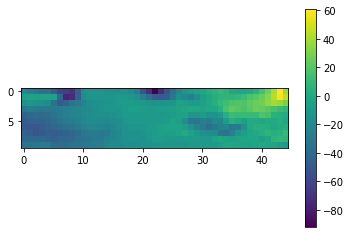

In [86]:
plt.imshow(dataset['CESM2'][65:75,105:150]*365)
plt.colorbar()

In [97]:
MH_lat

{'AWI-ESM-1-1-LR': array(18.57681519),
 'CESM2': array(13.81676632),
 'EC-Earth3-LR': array(13.82470984),
 'FGOALS-f3-L': array(13.32434197),
 'FGOALS-g3': array(13.61528268),
 'GISS-E2-1-G': array(15.52046976),
 'HadGEM3-GC31': array(14.66808336),
 'INM-CM4-8': array(16.03490175),
 'IPSL-CM6A-LR': array(13.79770463),
 'MIROC-ES2L': array(15.2157338),
 'MPI-ESM1-2-LR': array(16.67707326),
 'MRI-ESM2-0': array(15.690946),
 'NESM3': array(17.88029623),
 'NorESM1-F': array(16.51063774),
 'NorESM2-LM': array(14.42158023),
 'UofT-CCSM-4': array(16.36515277)}

In [98]:
PI_lat

{'AWI-ESM-1-1-LR': array(15.430751),
 'CESM2': array(14.02848235),
 'EC-Earth3-LR': array(14.28884486),
 'FGOALS-f3-L': array(11.80324073),
 'FGOALS-g3': array(11.85889826),
 'GISS-E2-1-G': array(13.89938602),
 'HadGEM3-GC31': array(12.36138078),
 'INM-CM4-8': array(12.89054439),
 'IPSL-CM6A-LR': array(12.8556761),
 'MIROC-ES2L': array(13.93224863),
 'MPI-ESM1-2-LR': array(12.98916177),
 'MRI-ESM2-0': array(12.40011948),
 'NESM3': array(14.80024356),
 'NorESM1-F': array(15.11250808),
 'NorESM2-LM': array(16.28112576),
 'UofT-CCSM-4': array(14.50210988)}

In [99]:
LAT

{'AWI-ESM-1-1-LR': [18.57681519236091, 15.430750998787849, 3.1460641935730624],
 'CESM2': [13.816766323796411, 14.028482354792716, -0.2117160309963051],
 'EC-Earth3-LR': [13.824709840148037, 14.28884486496671, -0.46413502481867397],
 'FGOALS-f3-L': [13.324341970583177, 11.803240732781521, 1.5211012378016555],
 'FGOALS-g3': [13.615282680688901, 11.858898258376707, 1.7563844223121947],
 'GISS-E2-1-G': [15.520469762963254, 13.899386020972925, 1.6210837419903292],
 'HadGEM3-GC31': [14.668083362473066, 12.361380776598423, 2.3067025858746426],
 'INM-CM4-8': [16.03490174917936, 12.890544387811506, 3.144357361367856],
 'IPSL-CM6A-LR': [13.797704625734871, 12.85567609599026, 0.9420285297446114],
 'MIROC-ES2L': [15.215733798310136, 13.93224862567078, 1.283485172639356],
 'MPI-ESM1-2-LR': [16.67707326333741, 12.989161769142264, 3.687911494195145],
 'MRI-ESM2-0': [15.690945999518252, 12.400119478052792, 3.29082652146546],
 'NESM3': [17.88029622785402, 14.800243557040943, 3.080052670813078],
 'NorE

In [17]:
MH_lat

{'AWI-ESM-1-1-LR': array(18.69878454),
 'CESM2': array(13.444877),
 'FGOALS-f3-L': array(13.52571392),
 'FGOALS-g3': array(11.3452412),
 'GISS-E2-1-G': array(15.5163558),
 'HadGEM3-GC31': array(14.67508079),
 'INM-CM4-8': array(16.03490175),
 'IPSL-CM6A-LR': array(13.81437104),
 'MIROC-ES2L': array(15.21907972),
 'MRI-ESM2-0': array(15.60320329),
 'NESM3': array(17.86386903),
 'NorESM1-F': array(16.48765894),
 'UofT-CCSM-4': array(16.40384097)}

In [18]:
PI_lat

{'AWI-ESM-1-1-LR': array(15.44904909),
 'CESM2': array(15.03338747),
 'FGOALS-f3-L': array(11.85668192),
 'FGOALS-g3': array(11.85430124),
 'GISS-E2-1-G': array(13.85916556),
 'HadGEM3-GC31': array(12.79850108),
 'INM-CM4-8': array(12.89054439),
 'IPSL-CM6A-LR': array(13.0887974),
 'MIROC-ES2L': array(14.10062473),
 'MRI-ESM2-0': array(12.68196468),
 'NESM3': array(14.80256105),
 'NorESM1-F': array(15.10306975),
 'UofT-CCSM-4': array(14.5035956)}

In [48]:
LAT

{'BCC-CSM1-1': [14.919333156749103, 13.887892860975086, 1.0314402957740167],
 'CCSM4': [16.797530557743404, 15.34237224646003, 1.4551583112833733],
 'CNRM-CM5': [17.61715004616017, 15.709293274052166, 1.907856772108003],
 'CSIRO-Mk3-6-0': [20.13060923227739, 17.97282110354337, 2.157788128734019],
 'CSIRO-Mk3L-1-2': [18.819394899440947, 11.79469494394857, 7.024699955492377],
 'EC-EARTH-2-2': [17.158388496626664, 14.56740752141096, 2.590980975215704],
 'FGOALS-g2': [17.4821369552887, 14.662527578738734, 2.8196093765499644],
 'FGOALS-s2': [15.338007999625232, 12.959744917546123, 2.3782630820791084],
 'GISS-E2-R': [16.362952860182148, 16.4603822203963, -0.0974293602141536],
 'HadGEM2-CC': [14.211426327545256, 17.316513693686154, -3.105087366140898],
 'HadGEM2-ES': [13.78728823787161, 14.581625698405702, -0.7943374605340914],
 'IPSL-CM5A-LR': [14.510895536438818, 12.725858053746864, 1.7850374826919548],
 'MIROC-ESM': [17.56006384249268, 15.474806124197313, 2.0852577182953684],
 'MPI-ESM-P':

In [64]:
LAT

{'AWI-ESM-1-1-LR': [18.6042941061879, 15.430740039925597, 3.1735540662623034],
 'CESM2': [14.351354448697023, 17.004185716659634, -2.652831267962611],
 'FGOALS-f3-L': [13.3539982920876, 11.42601598546201, 1.927982306625589],
 'FGOALS-g3': [13.426576843813478, 12.358489633664194, 1.0680872101492849],
 'GISS-E2-1-G': [15.486338805908177, 13.895844130041205, 1.5904946758669727],
 'HadGEM3-GC31': [14.970143282117327, 11.107973701397134, 3.8621695807201935],
 'INM-CM4-8': [15.608400426698083, 13.507228561637039, 2.101171865061044],
 'IPSL-CM6A-LR': [14.051429398640096, 13.269270276282779, 0.7821591223573172],
 'MIROC-ES2L': [15.182441009312823, 14.255730806096219, 0.9267102032166044],
 'MRI-ESM2-0': [15.480240252944535, 14.228236239673791, 1.252004013270744],
 'NESM3': [17.868952128777877, 14.18517677381897, 3.6837753549589074],
 'NorESM1-F': [16.76665344399234, 15.258915355872595, 1.5077380881197442],
 'UofT-CCSM-4': [16.500611279183836, 16.13429321206004, 0.366318067123796]}

In [32]:
LAT

{'AWI-ESM-1-1-LR': [18.698784538508388,
  15.449049086107921,
  3.2497354524004667],
 'CESM2': [13.444877003051676, 15.033387466587037, -1.5885104635353606],
 'FGOALS-f3-L': [13.525713921759332, 11.85668191870036, 1.6690320030589714],
 'FGOALS-g3': [11.345241201478487, 11.854301242499519, -0.5090600410210318],
 'GISS-E2-1-G': [15.516355804464236, 13.859165561948119, 1.6571902425161174],
 'HadGEM3-GC31': [14.675080791724989, 12.798501081828505, 1.8765797098964843],
 'INM-CM4-8': [16.03490174917936, 12.890544387811506, 3.144357361367856],
 'IPSL-CM6A-LR': [13.81437103611114, 13.088797400137706, 0.7255736359734346],
 'MIROC-ES2L': [15.219079719469823, 14.100624733787576, 1.1184549856822468],
 'MRI-ESM2-0': [15.603203293069459, 12.681964679367486, 2.9212386137019735],
 'NESM3': [17.863869034320388, 14.802561052620124, 3.0613079817002635],
 'NorESM1-F': [16.487658940668087, 15.103069745919727, 1.3845891947483597],
 'UofT-CCSM-4': [16.403840972374773, 14.503595599406935, 1.900245372967838]}

In [24]:
LAT

{'BCC-CSM1-1': [14.89175028598051, 13.955769669477421, 0.9359806165030893],
 'CCSM4': [16.568906008600543, 15.065655290741311, 1.5032507178592311],
 'CNRM-CM5': [16.84941993268409, 15.516978490442856, 1.3324414422412332],
 'CSIRO-Mk3-6-0': [26.678485504692087, 15.50754269514507, 11.170942809547018],
 'CSIRO-Mk3L-1-2': [32.54786716390895, 6.385278057826928, 26.16258910608202],
 'EC-EARTH-2-2': [17.14169955189843, 14.48361990382912, 2.658079648069311],
 'FGOALS-g2': [17.474267294969714, 14.635280366468416, 2.8389869285012974],
 'FGOALS-s2': [14.842193562991177, 12.81840174871919, 2.0237918142719877],
 'GISS-E2-R': [15.333116521304529, 14.204508976322202, 1.1286075449823265],
 'HadGEM2-CC': [14.193554063680523, 11.634138604899233, 2.55941545878129],
 'HadGEM2-ES': [14.635644153522925, 11.70405310958119, 2.9315910439417348],
 'IPSL-CM5A-LR': [14.178108858145645, 12.36947652012514, 1.8086323380205052],
 'MIROC-ESM': [17.50089600780695, 15.34947194684331, 2.15142406096364],
 'MPI-ESM-P': [16

In [34]:
lll=pd.DataFrame(LAT)
lll.to_csv('../../Expansion of NAF4.csv')

In [33]:
LAT

{'AWI-ESM-1-1-LR': [18.698784538508388,
  15.449049086107921,
  3.2497354524004667],
 'CESM2': [13.444877003051676, 15.033387466587037, -1.5885104635353606],
 'FGOALS-f3-L': [13.525713921759332, 11.85668191870036, 1.6690320030589714],
 'FGOALS-g3': [11.345241201478487, 11.854301242499519, -0.5090600410210318],
 'GISS-E2-1-G': [15.516355804464236, 13.859165561948119, 1.6571902425161174],
 'HadGEM3-GC31': [14.675080791724989, 12.798501081828505, 1.8765797098964843],
 'INM-CM4-8': [16.03490174917936, 12.890544387811506, 3.144357361367856],
 'IPSL-CM6A-LR': [13.81437103611114, 13.088797400137706, 0.7255736359734346],
 'MIROC-ES2L': [15.219079719469823, 14.100624733787576, 1.1184549856822468],
 'MRI-ESM2-0': [15.603203293069459, 12.681964679367486, 2.9212386137019735],
 'NESM3': [17.863869034320388, 14.802561052620124, 3.0613079817002635],
 'NorESM1-F': [16.487658940668087, 15.103069745919727, 1.3845891947483597],
 'UofT-CCSM-4': [16.403840972374773, 14.503595599406935, 1.900245372967838]}